In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

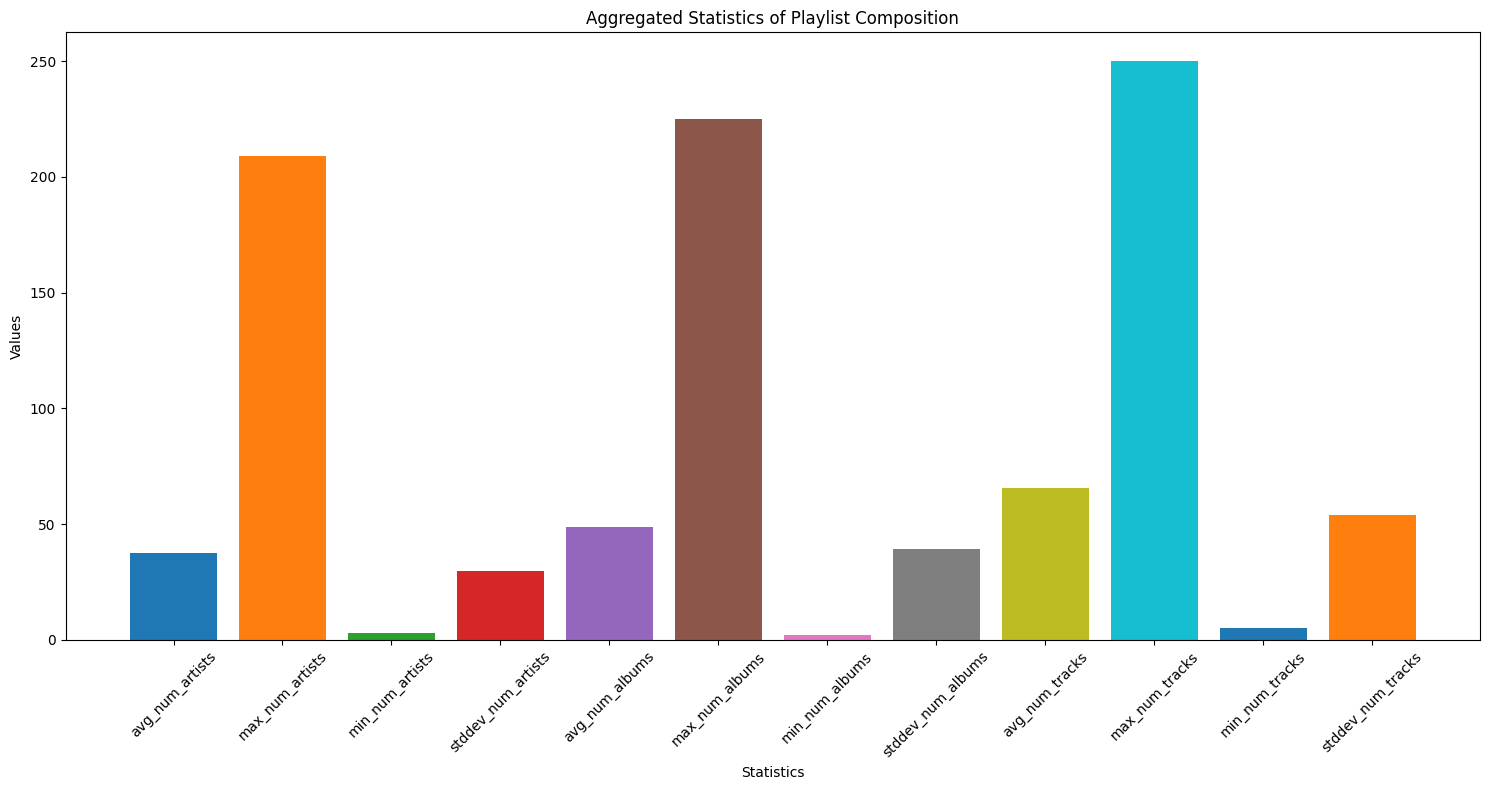

In [25]:

composition_df = pd.read_csv("data/COMPOSITION/playlist_composition_agg.csv")

stats = ['avg_num_artists', 'max_num_artists', 'min_num_artists', 'stddev_num_artists',
         'avg_num_albums', 'max_num_albums', 'min_num_albums', 'stddev_num_albums',
         'avg_num_tracks', 'max_num_tracks', 'min_num_tracks', 'stddev_num_tracks']

plt.figure(figsize=(15, 8))
for i, stat in enumerate(stats):
    plt.bar(i, composition_df[stat][0])

plt.xticks(range(len(stats)), stats, rotation=45)
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Aggregated Statistics of Playlist Composition')
plt.tight_layout()
plt.show()


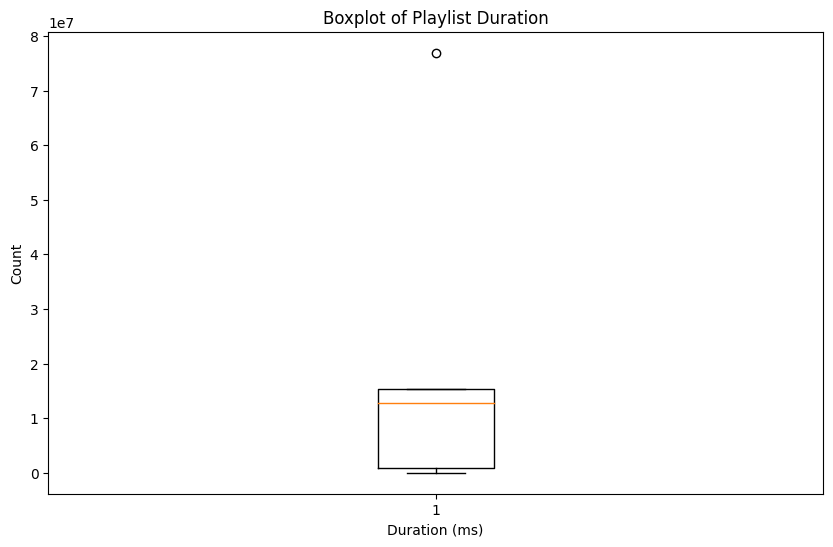

In [26]:
duration_stats_df = pd.read_csv("data/PLAYLISTDURATION/playlist_duration_stats.csv")

plt.figure(figsize=(10, 6))
plt.boxplot(duration_stats_df['duration_ms'])
plt.xlabel('Duration (ms)')
plt.ylabel('Count')
plt.title('Boxplot of Playlist Duration')
plt.show()


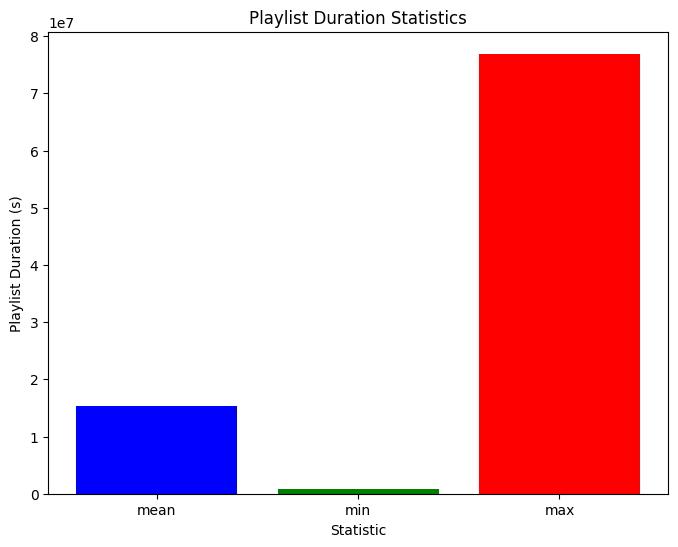

In [27]:
duration_stats_df = pd.read_csv("data/PLAYLISTDURATION/playlist_duration_stats.csv")


mean_duration = duration_stats_df[duration_stats_df['summary'] == 'mean']['duration_ms'].values[0]
min_duration = duration_stats_df[duration_stats_df['summary'] == 'min']['duration_ms'].values[0]
max_duration = duration_stats_df[duration_stats_df['summary'] == 'max']['duration_ms'].values[0]

stats = ['mean', 'min', 'max']
values = [mean_duration, min_duration, max_duration]

plt.figure(figsize=(8, 6))
plt.bar(stats, values, color=['blue', 'green', 'red'])
plt.xlabel('Statistic')
plt.ylabel('Playlist Duration (s)')
plt.title('Playlist Duration Statistics')
plt.show()

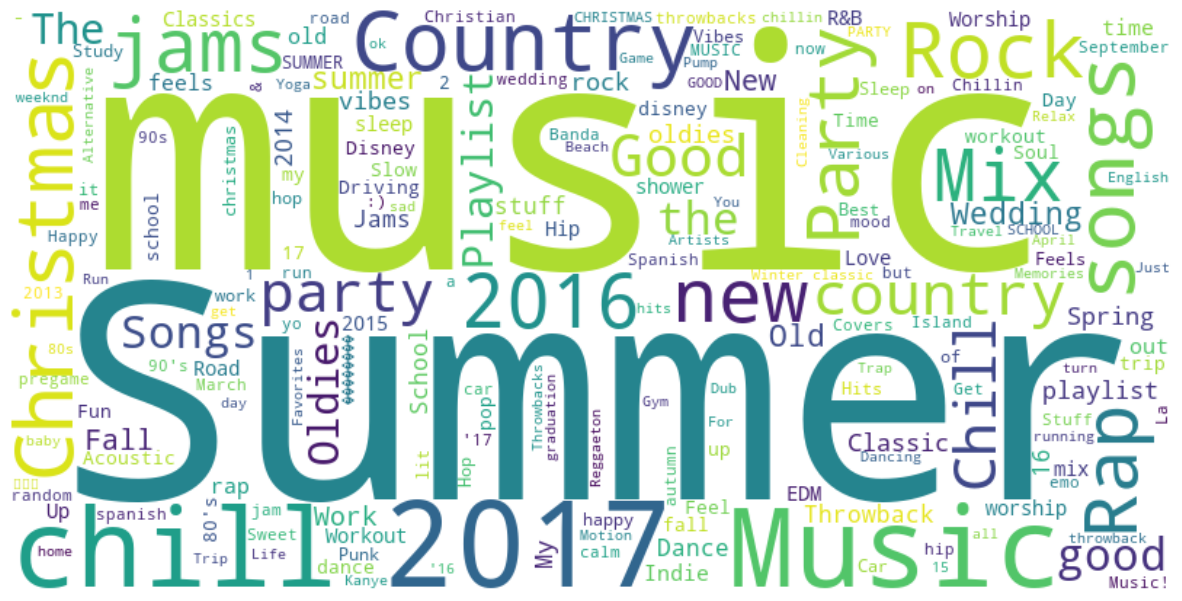

In [28]:
word_counts_df = pd.read_csv("data/PLAYLISTNAMEWC/word_counts.csv")

# Drop rows with any NaNs in 'word' or 'count' columns
word_counts_df = word_counts_df.dropna(subset=['word', 'count'])

word_counts_df['word'] = word_counts_df['word'].astype(str) # Ensuring all values are strings

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(word_counts_df['word'], word_counts_df['count'])))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


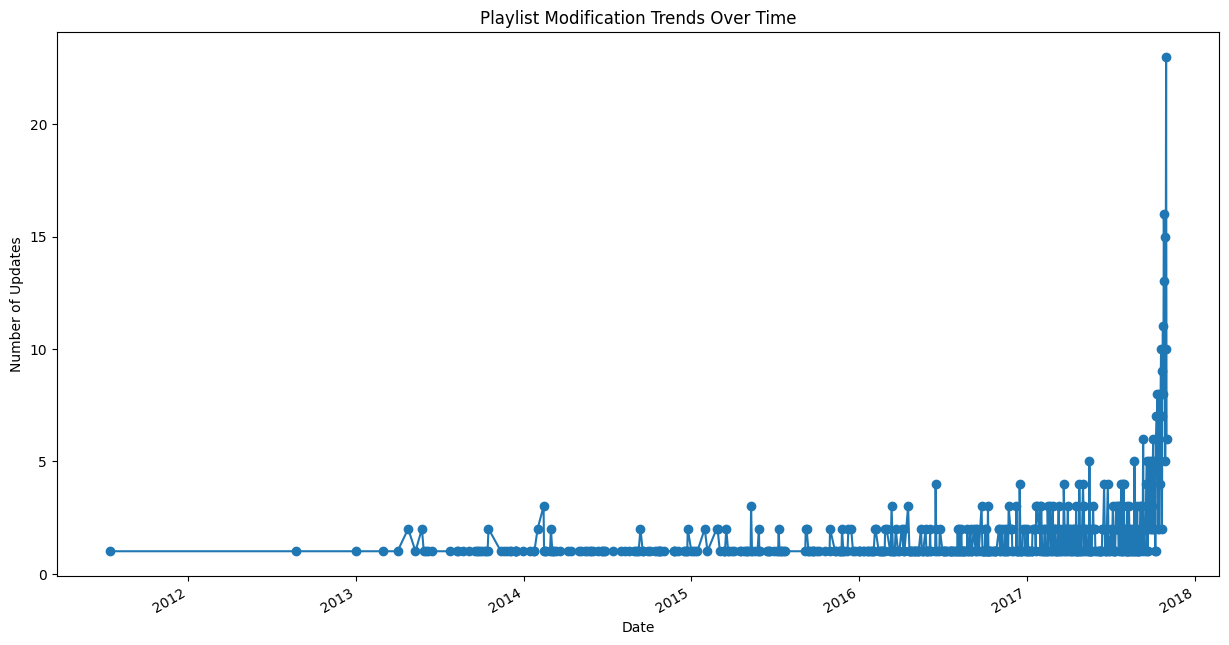

In [29]:
modification_df = pd.read_csv("data/PLAYLISTMODITRENDS/modification_trends.csv")

plt.figure(figsize=(15, 8))
plt.plot_date(pd.to_datetime(modification_df['modified_date']), modification_df['count'], linestyle='solid')
plt.gcf().autofmt_xdate()  
plt.xlabel('Date')
plt.ylabel('Number of Updates')
plt.title('Playlist Modification Trends Over Time')
plt.show()


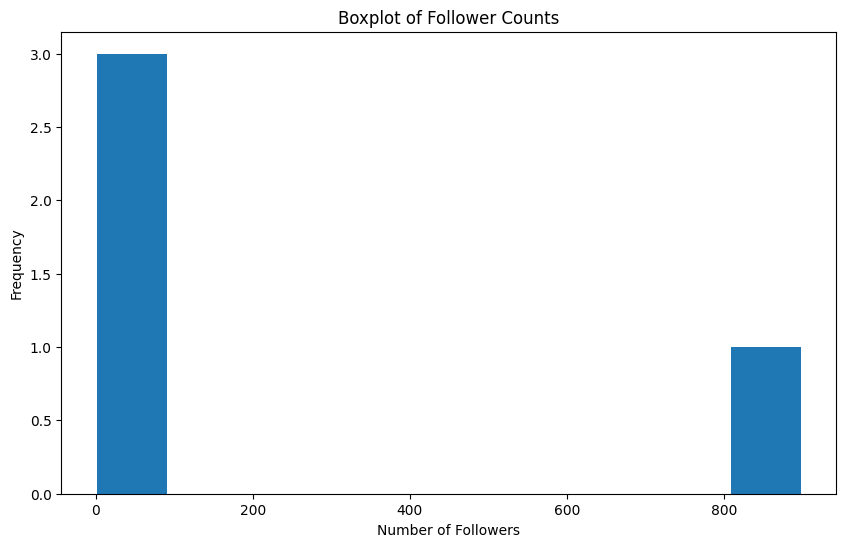

In [38]:
followers_df = pd.read_csv("data/PLAYLISTFOLLOWERSTATS/follower_counts_stats.csv")


plt.figure(figsize=(10, 6))
plt.hist(followers_df['num_followers'])
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.title('Boxplot of Follower Counts')
plt.show()


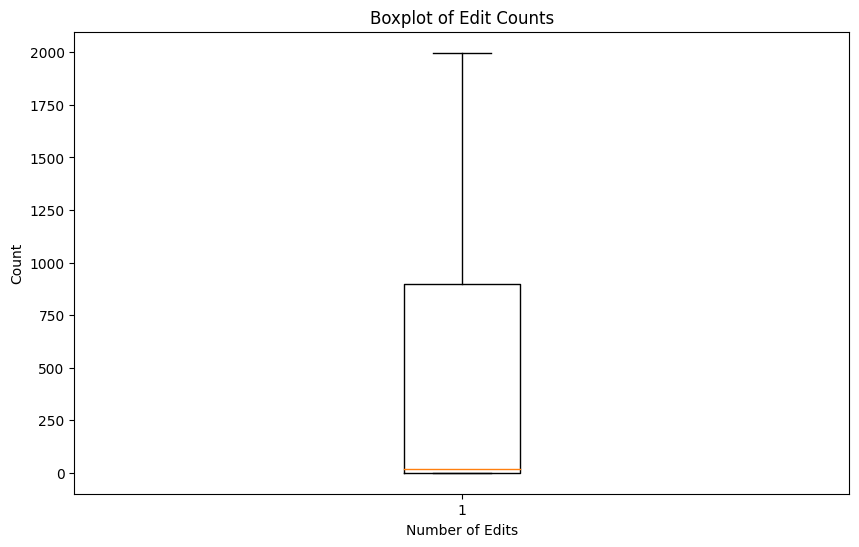

In [34]:
edits_df = pd.read_csv("data/PLAYLISTEDITS/edit_counts_stats.csv")

plt.figure(figsize=(10, 6))
plt.boxplot(followers_df['num_followers'])
plt.xlabel('Number of Edits')
plt.ylabel('Count')
plt.title('Boxplot of Edit Counts')
plt.show()


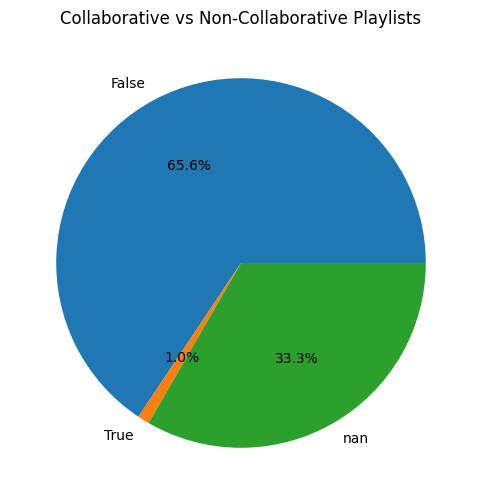

In [31]:
collaborative_df = pd.read_csv("data/PLAYLISTTYPE/collaborative_counts.csv")

# Pie chart for collaborative vs non-collaborative
plt.figure(figsize=(8, 6))
plt.pie(collaborative_df['count'], labels=collaborative_df['collaborative'], autopct='%1.1f%%')
plt.title('Collaborative vs Non-Collaborative Playlists')
plt.show()


The following is just an experiment with the old data:

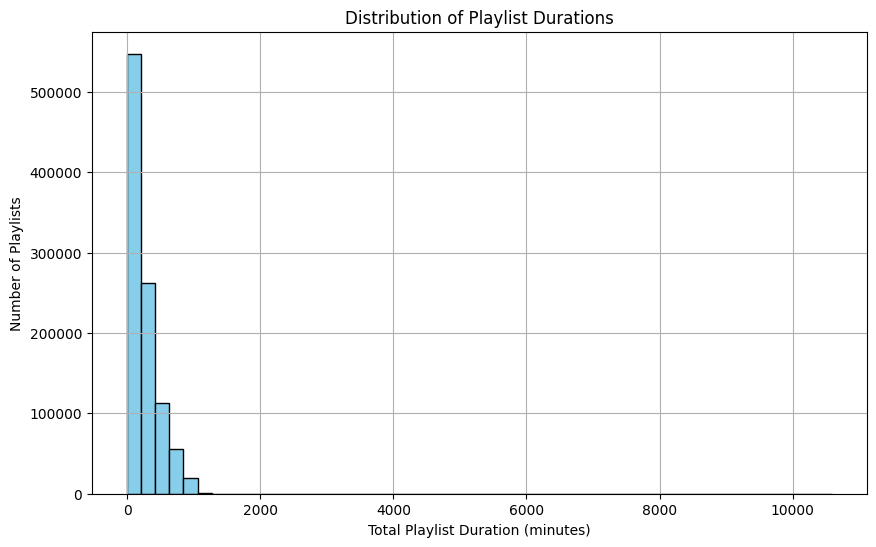

In [35]:
import os

csv_directory = 'olddata/PLAYLISTDURATION'

all_files = [os.path.join(csv_directory, file) for file in os.listdir(csv_directory) if file.endswith('.csv')]
df_list = [pd.read_csv(file) for file in all_files]
playlist_duration_df = pd.concat(df_list)

# Convert duration from milliseconds to minutes for easier interpretation
playlist_duration_df['total_duration_min'] = playlist_duration_df['total_duration'] / 60000

plt.figure(figsize=(10, 6))
plt.hist(playlist_duration_df['total_duration_min'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Total Playlist Duration (minutes)')
plt.ylabel('Number of Playlists')
plt.title('Distribution of Playlist Durations')
plt.grid(True)
plt.show()
